# 🏡 Predição de Preços de Casas com Random Forest

Este notebook aplica **Machine Learning (Regressão)** para prever preços de imóveis usando o dataset `train.csv`.
O modelo principal é o **Random Forest Regressor**, comparado com o **Decision Tree Regressor**.


In [9]:
#Bibliotecas e ferramentas necessarias
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.tree import DecisionTreeRegressor

# Carregar dataset
df = pd.read_csv("../Dados/train.csv")

# Preenchendo dados vazios
colunas_numericas = df.select_dtypes(include=['int64', 'float64']).columns
colunas_categoricas = df.select_dtypes(include=['object']).columns
df[colunas_numericas] = df[colunas_numericas].fillna(0)
df[colunas_categoricas] = df[colunas_categoricas].fillna('Desconhecido')

df.head()


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Desconhecido,Reg,Lvl,AllPub,...,0,Desconhecido,Desconhecido,Desconhecido,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Desconhecido,Reg,Lvl,AllPub,...,0,Desconhecido,Desconhecido,Desconhecido,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,Desconhecido,IR1,Lvl,AllPub,...,0,Desconhecido,Desconhecido,Desconhecido,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,Desconhecido,IR1,Lvl,AllPub,...,0,Desconhecido,Desconhecido,Desconhecido,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,Desconhecido,IR1,Lvl,AllPub,...,0,Desconhecido,Desconhecido,Desconhecido,0,12,2008,WD,Normal,250000


In [10]:
#Definindo feauture e target
y = df.SalePrice
colunas_features = ["LotArea", "YearBuilt", "1stFlrSF", "2ndFlrSF",
                   "FullBath", "BedroomAbvGr", "TotRmsAbvGrd"]
X = df[colunas_features]

train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=1)


In [11]:
#Elaborando modelos
modelo_rf = RandomForestRegressor(random_state=1)
modelo_rf.fit(train_X, train_y)

previsao_rf = modelo_rf.predict(val_X)
mae_rf = mean_absolute_error(val_y, previsao_rf)

print(f"Random Forest MAE: {mae_rf:.2f}")


Random Forest MAE: 21857.16


Leaves: 5, MAE: 35044.51
Leaves: 50, MAE: 27405.93
Leaves: 500, MAE: 28357.63
Leaves: 5000, MAE: 28942.76


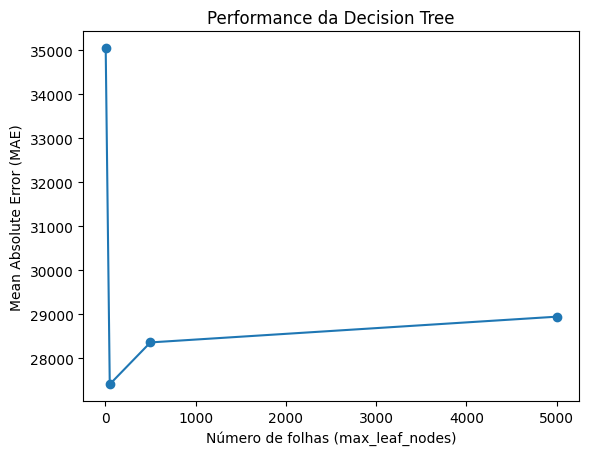

In [14]:
#Modelo de DecisionTree para comparcao
def get_mae(n_leaves, train_X, val_X, train_y, val_y):
    modelo_dt = DecisionTreeRegressor(max_leaf_nodes=n_leaves, random_state=1)
    modelo_dt.fit(train_X, train_y)
    previsao_dt = modelo_dt.predict(val_X)
    return mean_absolute_error(val_y, previsao_dt)

folhas = [5, 50, 500, 5000]
scores = {n: get_mae(n, train_X, val_X, train_y, val_y) for n in folhas}

for leaves, mae in scores.items():
    print(f"Leaves: {leaves}, MAE: {mae:.2f}")

# Plotar o gráfico
import matplotlib.pyplot as plt

plt.plot(list(scores.keys()), list(scores.values()), marker="o")
plt.title("Performance da Decision Tree")
plt.xlabel("Número de folhas (max_leaf_nodes)")
plt.ylabel("Mean Absolute Error (MAE)")
plt.show()

## 🔎 Análise dos Resultados

- A árvore de decisão com **50 folhas** teve o melhor desempenho, com o menor mean absolute error (MAE).
- Isso acontece porque existe um **equilíbrio** entre modelos muito simples (poucas folhas → underfitting) e muito complexos (muitas folhas → overfitting).
- O **Random Forest** ainda tende a generalizar melhor, mas neste caso, a **árvore de 50 folhas** chegou muito próxima.

➡️ Este comportamento é um exemplo clássico do **trade-off viés x variância**:
- **Underfitting (alto viés):** modelo simples, não aprende bem os padrões.
- **Overfitting (alta variância):** modelo complexo demais, memoriza os dados.
- **Equilíbrio:** encontramos um ponto intermediário (neste caso, ~50 folhas).


